In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = keras.Sequential();
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) #30% 뉴런의 출력을 0으로 만듦
model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy') #앞에서 배운 것에 sparse가 추가되었다. 이러면 원-핫코딩(to_categorical)을 사용할 필요가 없다
#옵티마이저는 적지 않을 경우 Minibatch-SGD(미니배치 확률적 경사하강법)이 기본값으로 설정되어 있다.
history = model.fit(x_train, y_train,epochs = 20, validation_data = (x_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.9024 - val_loss: 0.1676 - val_accuracy: 0.9498
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1954 - accuracy: 0.9450 - val_loss: 0.1252 - val_accuracy: 0.9642
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1648 - accuracy: 0.9542 - val_loss: 0.1229 - val_accuracy: 0.9674
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1519 - accuracy: 0.9582 - val_loss: 0.1116 - val_accuracy: 0.9711
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9626 - val_loss: 0.1120 - val_accuracy: 0.9710
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1403 - accuracy: 0.9627 - val_loss: 0.1093 - val_accuracy: 0.9728
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9650 - val_loss: 0.1101 - val_accuracy:

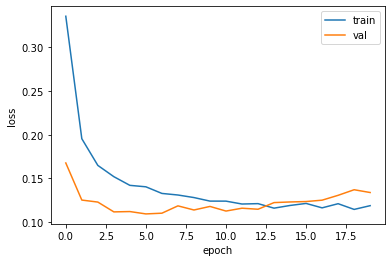

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model.save_weights('model-weights2.h5') #모델의 파라미터만 저장
model.save('model-whole2.h5') #모델과 파라미터 둘 다 저장
!ls -al *.h5 #노트안에서 셸 명령을 사용할 땐 !을 쓴다

-rw-rw-r-- 1 c4nd0it c4nd0it 661320  1월 12 16:18 best-model.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 332480  1월 12 16:24 model-weights2.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 332480  1월 12 16:17 model-weights.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 661264  1월 12 16:24 model-whole2.h5
-rw-rw-r-- 1 c4nd0it c4nd0it 333808  1월 12 16:17 model-whole.h5


In [9]:
model1 = keras.Sequential();
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(100,activation='relu'))
model1.add(keras.layers.Dropout(0.3)) #30% 뉴런의 출력을 0으로 만듦
model1.add(keras.layers.Dense(10,activation='softmax'))
model1.load_weights('model-weights2.h5') # 저장된 파라미터를 가져온다

In [10]:
pred = model1.predict(x_test)

In [11]:
print('x_test의 0번째 정답은 :',np.argmax(pred[0])) # 모델이 예측한 x_test의 첫번째 값
print('실제 0번째 정답은 :',y_test[0]) # 실제 정답

x_test의 0번째 정답은 : 7
실제 0번째 정답은 : 7


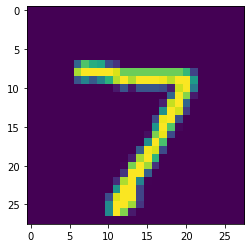

In [12]:
plt.imshow(x_test[0].reshape(28,28)) # 이미지 출력

In [13]:
model2 = keras.models.load_model('model-whole2.h5')# 모델과 파라미터를 불러오는 것도 간단하다

In [14]:
model = keras.Sequential();
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3)) 
model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model2.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train,epochs = 20, validation_data = (x_test, y_test),callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.9016 - val_loss: 0.1560 - val_accuracy: 0.9532
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1900 - accuracy: 0.94

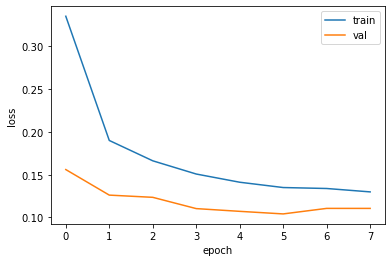

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()